# Programming Project 1 analysis using EDA tools

### Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset and save it to a dataframe named 'df'
df = pd.read_csv('Individual_Project_1.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
![image.png](attachment:image.png)

In [4]:
df.head()

,Initials,Date,Course_ID,time(m),Summary
0,JR,1/9/23,MATH-117-01,25,Studied Chapter 1.1
1,JR,1/10/23,MATH 205-02,15,Read into Syllabus
2,JR,1/11/23,MATH-117-01,30,Studied Chapter 2.1 practice problems
3,JR,1/12/23,MATH 205-02,60,Tutoring session for chapter 1
4,JR,1/13/23,DS-160-01,20,Looked further into excel formulas


In [5]:
df.shape

(35, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   35 non-null     object
 1   Date       35 non-null     object
 2   Course_ID  35 non-null     object
 3   time(m)    35 non-null     int64 
 4   Summary    35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [7]:
df.isna().sum()

Initials     0
Date         0
Course_ID    0
time(m)      0
Summary      0
dtype: int64

In [ ]:
# Is there any column you want to drop? If yes which column and why?
yes Summary column I want to drop because it contains the text which is useless for the data analysis

In [8]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Calculate the day of the month and create a new column named 'Day'
df['Day'] = df['Date'].dt.day

In [ ]:
# Create a new column called Day_name using  .dt.day_name()


### Answer the questions

In [10]:
# What is the average time you have spend for learning?
df['Day_name'] = df['Date'].dt.day_name()

In [11]:
# Display all of the entries where you have spent more than the average time to learn 
avg_time = df['time(m)'].mean()
print("The average time spent for learning is:", avg_time, "minutes.")

The average time spent for learning is: 80.85714285714286 minutes.


In [12]:
# Which course you have spent the maximum time to prepare?
course_times = df.groupby('Course_ID')['time(m)'].sum()
max_time_course = course_times.idxmax()
print("The course with the maximum time spent for preparation is:", max_time_course)

The course with the maximum time spent for preparation is: MATH-117-01


In [17]:
# Which day of the week you sepent most of the time?
day_times = df.groupby('Day_name')['time(m)'].sum()
max_time_day = day_times.idxmax()
print("The day of the week with the most time spent for learning is:", max_time_day)

The day of the week with the most time spent for learning is: Sunday


### Investigate the distribution of Time, adding the mean. How the data distributed?
![image.png](attachment:image.png)

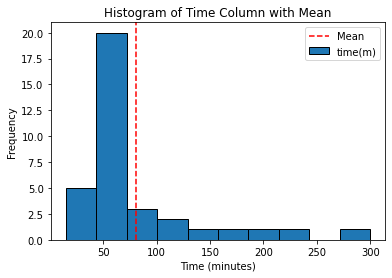

In [18]:
time_mean = df['time(m)'].mean()

df['time(m)'].plot(kind='hist', bins=10, edgecolor='black')
plt.axvline(x=time_mean, color='r', linestyle='--', label='Mean')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Column with Mean')
plt.legend()
plt.show()

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings.
![image.png](attachment:image.png)

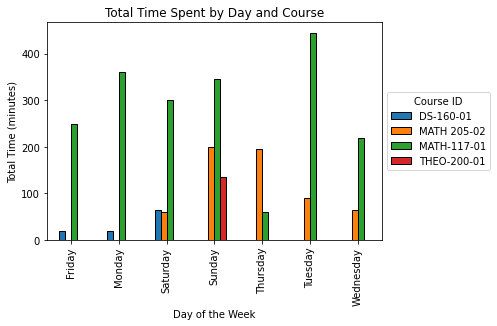

In [19]:
grouped_data = df.groupby(['Day_name', 'Course_ID'])['time(m)'].sum().unstack()
grouped_data.plot(kind='bar', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Total Time (minutes)')
plt.title('Total Time Spent by Day and Course')
plt.legend(title='Course ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Investigate the measure of dispersion (table and plot) of time column.
![image.png](attachment:image.png)

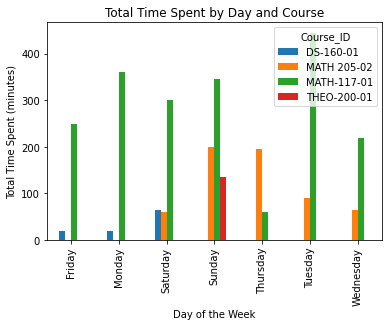

### Investigate the the distribution of time by Day_name
![image.png](attachment:image.png)

In [20]:
range_time = df['time(m)'].max() - df['time(m)'].min()
var_time = df['time(m)'].var()
std_time = df['time(m)'].std()

dispersion_data = {'Range': range_time, 'Variance': var_time, 'Standard Deviation': std_time}
dispersion_table = pd.DataFrame(dispersion_data, index=['Time'])
print(dispersion_table)

      Range     Variance  Standard Deviation
Time    285  3547.773109           59.563186


### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
![image.png](attachment:image.png)

In [10]:
lm_plot=sns.lmplot(x='Day_name',
                   y='time(m)',
                   data='df',
                   hue='Day/Time',
                  ci=False)

TypeError: string indices must be integers

### Create a pair plot of Day and Time and add course id as hue
![image.png](attachment:image.png)

In [13]:
pair_plot=sns.pairplot(df['Day_time','time(m)'], hue='Course ID')

NameError: name 'df' is not defined

### Display the Heatmap and comment on your findings
![image.png](attachment:image.png)

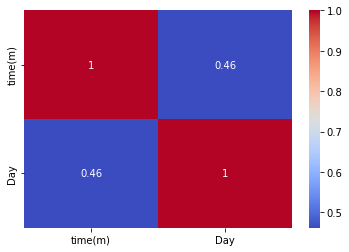

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()